## Scientific Computing 2021: Final exam 
Friday October 29, 2021, 16:00 - 19:00

This exam includes **5 tasks** based on the lecture materials and **7 problems** based on the materials of exercise sessions and homeworks. Each fully solved task or problem gives you 2 points. To obtain the full grade  you need to achieve the total score of 20 points.

### Task 1 (2 points)
1. Traditional scientific and engineering approach includes only theory and experiment. List at least three disadvantages/limitations of such approach, which could be managed by adding the computational simulations. (1 point) 
2. List at least three applications of scientific computing. Justify your answer with explanation why computer simulations or/and mathematical modelling methods are important in those areas. (1 point) 

1. List at least three disadvantages/limitations of such approach, which could be managed by adding the computational simulations. 
- experiments which are difficult to conduct: building large wind tunnels to test aerodynamics of the planes
- unrepeatable experiments: continuous enlargement of the universe, explosions of the supernovas...
- dangerous experiments: test of the nuclear weapons
2. List at least three applications of scientific computing. Justify your answer with explanation why computer simulations or/and mathematical modelling methods are important in those areas. 
- Weather forecast(needs high speed of continuous simulation to keep up with real time)
- Particle physics(computations with high amount of particles are very time-consuming and contain a lot of data)
- Bioinformatics(protein folding, DNA searching)

### Task 2 (2 points)
1. Explain the overheads of Parallelism. (1 point) 
2. Give the definition of OpenMP and MPI. Explain difference between them. Write down pros and cons of both. (1 point)

### Task 3 (2 points)
1. What is the Cauchy problem for an ODE? Give the general form and an example. Under which condition a Cauchy problem has the unique solution? (1 point) 
2. Describe the idea of the Molecular dynamics method. (1 point)

1. Cauchy problem for ODE is a problem which asks for solution of ODE satisfying boundary and ininitial conditions set on the boundary surface for variable value and values of variable derivatives.
2. Molecular dynamics method is a computer simulation method for analyzing the physical movements of atoms and molecules.\
The molecular dynamics method is applicable if the De Broglie wavelength of an atom (or particle) is much smaller than the interatomic distance.
- Motion of particles is described through calssical mechanics
- Forces between particles are potential forces described through gradient of potential energy of the system
- the trajectories of each and every particle are not traced because they are not needed to obtain macroscopic thermodynamics results
- The sets of configurations obtained in the course of calculations by the method of molecular dynamics are distributed in accordance with some statistical distribution function, for example, corresponding to the microcanonical distribution.

### Task 4 (2 points)
1. Why do we need to study wavelets? Which advantages the wavelets transform has in comparison with Fourier Transform? (1 point) 
2. Write the general form of the Integral Equation. Describe its parts and provide the classification of integral equations with respect to those parts. (1 point) 

1. Each function can be approximated with CFT. With CFT we can see the frequency of the phenomena but can't see when or where the phenomena with exact frequency occurred.
Wavelets can be used to locate these phenomena with certain frequencies.
2. general form of the Integral Equation\
$A$ — integral operator which can be expressed as follows:\
$Ay(x) = \lambda \int_\Omega K(x, \xi)y(\xi)d\xi$\
$\Omega$ — is some domain (may represent the whole space).\
$K(x, \xi)$ — is a Kernel\
$y(x)$ — is unknown function to be found.\
$f (x)$ — is a right-hand side.

### Task 5 (2 points)
1.  Provide the definitions of well-posed and ill-posed problems. Explain those two kinds of problems in terms of the operator in general form  $A\mathbf{x} = \mathbf{b}$. (1 point)
2. What is the convolution theorem? Describe why this property is useful. Justify your answer with examples. (1 point)

1. There are 3 main points to consider in order to classify problems:
- a solution exists
- it is unique
- solution depends continuously on input data
---
The problem is well-posed if:
  - A solution exists;
  - The solution is unique;
  - The solution depends continuously on the input data.
---
Otherwise the problem is ill-posed.\
In terms of the operator:
the problem is ill-posed if:
1. $A^{-1}$ does not exist;
2. $A^{-1}$ is not defined on the whole set $B: AX \neq B$;
3. $A^{-1}$ is not continuous;
4. $A^{-1}$ is not defined uniquely.\
It is well posed otherwise
---
2. convolution theorem\
Under suitable conditions the Fourier transform of a convolution of two functions (or signals) is the pointwise product of their Fourier transforms.\
More generally, convolution in one domain (e.g., time domain) equals point-wise multiplication in the other domain (e.g., frequency domain).\
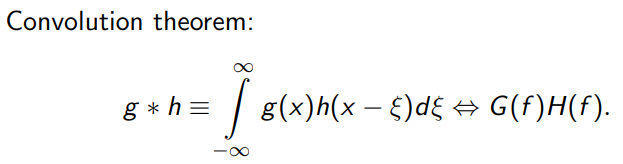\
Convolution theorem can be used to make convolution faster by transforming inputs to frequency space via FFT, multiplying them and transforming them back by IFT  

### Problem 1 (2 points)

Assume that, as in Amdahl's law, a program has a sequential, non-parallelizable part, and the remaining part is ideally parallelizable. Suppose that the efficiency of parallelizing the program to $n_1=5$ processes is $a_1=0.5$.  Find the efficiency of parallelizing the program to $n_2=2$ processes.  

Amdahl's law:
$\text{Speedup}(P) =\frac{Time(1)}{Time(P)} = \frac{1}{(s+ \frac{1−s}{P})} $, where **P** is a number of processors and **s** is non-parallelizable.
$\text{Efficiency}(P=5) =\dfrac{\text{Speedup(P)}}{P}= \frac{1}{(P s+ 1−s)}=\frac{1}{(5 s+ 1−s)}=0.5 \Rightarrow 2=4s+1, s=0.25 $\
Then $\text{Efficiency}(P=2) = \frac{1}{(P s+ 1−s)}=\frac{1}{(2\cdot 0.25+ 1−0.25)}=0.8$\
Answer is: 0.8

### Problem 2 (2 points)
Write an MPI program computing the maximum of an array. The array must be randomly generated in the root process, then divided in chunks and distributed to all processes. Each process must compute the maximum in its chunk, and then the results must be reduced at the root process. 

In [ ]:
!pip install mpi4py

In [ ]:
#mpi.py
from mpi4py import MPI
import numpy as np


comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

def get_max(Arr):
  l=len(Arr)//size
  if rank != size-1:
    A = Arr[l*rank:l*(rank+1)]
  else:
    A = Arr[l*rank:]
  return max(A)

if rank ==0:
  Arr=np.random.rand(50,1)*100
  for r in range(1,size):
    comm.send(Arr, dest=r)
else:
  Arr=comm.recv(source=0)
local_max=np.array(get_max(Arr))
print(f"rank {rank},local max = {local_max}")
total_max = np.array([0])
comm.Reduce(local_max,total_max, op = MPI.MAX,root=0)

if rank == 0:
  print("Arr=",Arr)
  print("The max number is ", total_max)

In [21]:
!mpirun --allow-run-as-root -np 7 python mpi.py

rank 2,local max = [93.67847027]
rank 1,local max = [61.50866365]
rank 0,local max = [55.85794279]
rank 5,local max = [76.49348705]
rank 6,local max = [91.77528628]
rank 4,local max = [99.49092473]
rank 3,local max = [80.14961601]
[[55.26706346]
 [51.22063647]
 [46.82621748]
 [ 6.14417366]
 [11.62099876]
 [19.17950944]
 [55.85794279]
 [61.50866365]
 [15.96943997]
 [52.76407215]
 [51.83394095]
 [36.94897499]
 [51.27917105]
 [44.83353672]
 [45.65410596]
 [16.19316448]
 [57.18687432]
 [93.67847027]
 [89.52919196]
 [ 6.8985091 ]
 [63.26476141]
 [80.14961601]
 [25.22263452]
 [67.52222519]
 [ 1.10653716]
 [49.15783752]
 [44.44599958]
 [75.38724428]
 [32.09612648]
 [96.162266  ]
 [99.49092473]
 [34.31541241]
 [95.89124792]
 [15.97429673]
 [92.01724617]
 [50.5912672 ]
 [76.49348705]
 [39.60546293]
 [11.50460754]
 [72.52209829]
 [43.0048017 ]
 [72.01599466]
 [91.77528628]
 [17.26612797]
 [84.35055979]
 [26.22896911]
 [ 1.79495033]
 [ 7.58286967]
 [82.03289374]
 [59.32545783]]
The max number is 

### Problem 3 (2 points)

We are solving the linear system $A\mathbf x=\mathbf b$ with $A=\begin{pmatrix}0 & 10^{-2}\\ 10^{-2} & 10^3\end{pmatrix}$ and some $\mathbf b$. Suppose that we know $\mathbf b$ with the relative error $\epsilon_{\mathbf b}=10^{-15}$. Give an upper bound for the relative error of $\mathbf x$.


### Problem 4 (2 points)
Consider the problem https://www.spoj.com/problems/ADASTRNG/. Explain how the problem can be solved by an algorithm of complexity $O(N\log^c N),$ where $N$ is the length of the input string, and $c$ is some constant. Specify a particular $c$. (**Remark:** you don't need to write the program, it is sufficient to explain the logic of the algorithm). 

### Problem 5 (2 points)

For which sequences $f=(f[0], f[1], \ldots, f[N-1])$ is their Discrete Fourier Transform $\widehat f$ **purely imaginary**?


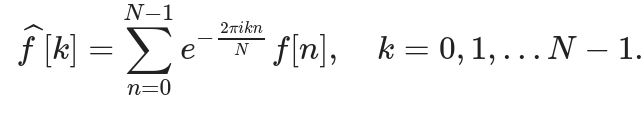

$\hat f$ is purely imaginery -> $\hat f^*[k]= \hat f[-k]$\
$f[k]=\dfrac{1}{N} \sum_{n=0}^{N-1}e^{+\dfrac{2 \pi i k n}{N}} \hat f[n] = \dfrac{1}{N} \sum_{n=0}^{N-1}\left(e^{-\dfrac{2 \pi i k n}{N}}\right)^* \hat f[n] = -\left(\dfrac{1}{N} \sum_{n=0}^{N-1}e^{\dfrac{2 \pi i (-k) n}{N}} \hat f[n]\right)^*=-f[-k] \Rightarrow f[k]=-f[-k]$


### Problem 6 (2 points)

Suppose that we are solving the ODE $\tfrac{d}{dt} x=-x$ iteratively, using the centered approximation for the derivative:

$$\frac{\tilde x_{n+1}-\tilde x_{n-1}}{2\Delta t}=-\tilde x_n.$$

Determine theoretically for which $\Delta t$ the numerical solution does not diverge, i.e. $\sup_n \tilde x_n^2 <\infty$.

### Problem 7 (2 points)

Recall that the Radon transform is defined by 

$$Rf(\alpha, s) =  \int_{-\infty}^\infty f(z\sin\alpha+s\cos\alpha, -z\cos\alpha+s\sin\alpha) dz.$$ 

Suppose that $f$ is an indicator function of some set $A\subset \mathbb R^2$, i.e. $f(x,y)=\begin{cases}1,& (x,y)\in A\\ 0,&(x,y)\notin A\end{cases}$. Suppose that $Rf(\alpha, s)=0$ for all $\alpha, s$ such that $|s-\cos \alpha|>1$. What is the largest possible area of $A$? Describe this $A$.